## Security Alert for Tate with Contour Detection ##

Recently, I got this opportunity to be on charge in the digital department of Tate Modern. To highlight our team in the museum, I have been thinking over how big data solutions can be implemented here. I wanted to offer a solution to rivet the security implementing basic Computer Vision technique.

On this wall, there are three major paintings by **Mark Rothko**, who is known as the inventor of *Abstract Expressionism* in the 20th century. To protect these original masterpieces, is one essential for the prestife.

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. Contours come handy in shape analysis, finding the size of the object of interest, and object detection.

In this wise, periodically captured images in this room are analyzed via *contour detection* and if the number of paintings at a time is wrong, an alert will be triggered, which is the ultimate goal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# load the image
image = cv2.imread("mark-rothko.jpg")
# convert to RGB, remembering coloring defaults of openCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

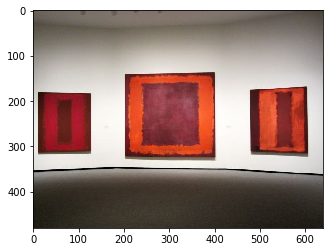

In [2]:
# see the Rothko's Seagram Murals
plt.imshow(image)
plt.show()

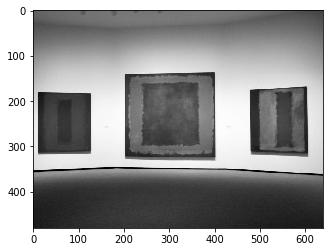

In [3]:
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

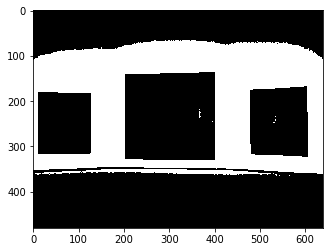

In [4]:
# create a binary thresholded image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# show it
plt.imshow(thresh, cmap="gray")
plt.show()

In [5]:
# find the contours from the thresholded image
contours, _= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

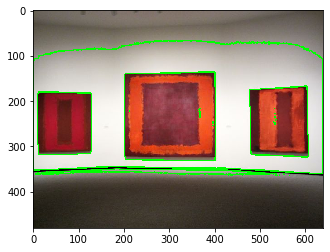

In [6]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

As seen in green, contours are rendered inlets and other unwanted portions.
This attempt does not seem **accurate**, so let's tweak on our approach in order to get a good result. 

1. Crop the image to focus on our interest area.

In [7]:
# reload the original file again
image = cv2.imread("mark-rothko.jpg")

# crop the image using array slices -- it's a NumPy array
cropped = image[100:330, 0:640]
cv2.imshow("cropped", cropped)
cv2.waitKey(0)

-1

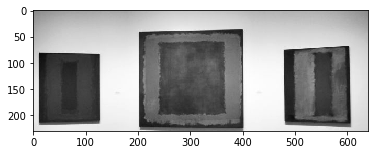

In [8]:
# convert to RGB
cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

2. Apply gaussian blur to remove random noise that caused unwanted inlet contours

In [9]:
thresh = cv2.GaussianBlur(thresh, (5,5), 0)

3. Change Threshold

Although OTSU is mostly useful however in this case it is not the optimal one. We try BINARY_INV with some elaborated params

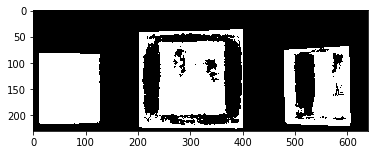

In [10]:
# create a binary thresholded image
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# let's see now
plt.imshow(thresh, cmap="gray")
plt.show()

4. Draw the contours and run the calculation (contours covering each painting)

In [11]:
# find the contours from the thresholded image
contours, _= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(cropped, contours, -1, (0, 255, 0), 2)

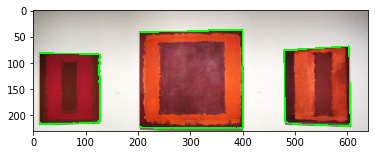

In [12]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [13]:
print("Number of Paintings found = " + str(len(contours)))

Number of Paintings found = 3


In [14]:
# let's check if there is any theft
if len(contours) < 3:
    print("Go to the saloon 4!")
else:
    print("All is under control in room 4.")

All is under control in room 4.


Absolutely there exist solid ANN (Aritificial Neural Network)methods applied in object detection. Here, I just wanted to show how basics can also help us tackle with some problems at initial steps.

We have just got familiarizing with foundations of computer vision, but even with basics we can implement solutions useful for real life cases.



***Arif Can Aksoy***